# A.G.N

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 98% !important; }</style>"))

In [2]:
#config: same as 3.0 

## Full Synchrotron Spectra

In [3]:
import numpy
import numpy as np
import math as m
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import quad, dblquad
import scipy.special as sp
import scipy.constants as cn
import numpy
import numpy as np
import math as m
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import quad, dblquad
import scipy.constants as cn
import scipy.special as sp
import astropy.units as u
from agnpy.emission_regions import Blob
from agnpy.synchrotron import Synchrotron
from agnpy.utils.plot import plot_sed
import time

start = time.time()
kpc = 3.085677558128*10**21
pc = 3.085677558128*10**18

#Constants in cgs
fortio =4.80*10**(-10)
c = 2.997925*10**10
me =9.109*10**(-28)
mp = 1.672614*10**(-24)
hpl = 6.25*10**(-27)

B1=0.001 #s.f.p
B2=0.01
B3=0.1

gmin_e = 1.2*10**5
gmax_e = 2*10**6

gmin_p = 3*10**4
gmax_p = 3*10**5

ps_e = 4.
ps_p = 2

Ro=10**10

No_e=6.5*10**50 #f.p
No_p=1.5*10**56

d_L= 18.5*10**3*kpc#(source luminosity distance):1.00e+27 cm


#kpc to cm 3.085677558128


C_e=No_e*(-ps_e+1)/((me*c**2)**(-ps_e+1)*(gmax_e**(-ps_e+1)-gmin_e**(-ps_e+1)))
C_p=No_p*(-ps_p+1)/((mp*c**2)**(-ps_p+1)*(gmax_p**(-ps_p+1)-gmin_p**(-ps_p+1)))
Constant_e=(C_e*4*cn.pi*fortio**2*me*c*(me*c**2)**(-ps_e))/3
Constant_p=(C_p*4*cn.pi*fortio**2*mp*c*(mp*c**2)**(-ps_p))/3

#Electrons power [erg/s]
def p_e(n,B):
    res = dblquad(lambda x, g: Constant_e*n*g**(-2-ps_e)*(9+36*x**2+16*x**4)/((3+4*x**2)*m.sqrt(1+(x**2)/3))*np.exp(-n*4*cn.pi*me*c*(1+(4*x**2)/3)*m.sqrt(1+x**2/3)/(g**2*3*fortio*B)), gmin_e, gmax_e, lambda x: 0, lambda x: np.inf)
    return res

v_e = numpy.logspace(10,20,100)
P_e = v_e*0
P_e2 = v_e*0
P_e3 = v_e*0

for i in range(len(v_e)):
    P_e[i] = p_e(v_e[i],0.001)[0]  
    P_e2[i] = p_e(v_e[i],0.01)[0]
    P_e3[i] = p_e(v_e[i],0.1)[0]
    
    
#Flux of the source
Fn_e = P_e/(4*cn.pi*d_L**2)
Fn_e2 = P_e2/(4*cn.pi*d_L**2)
Fn_e3 = P_e3/(4*cn.pi*d_L**2)




Ca_e=No_e*(-ps_e+1)/(4*cn.pi*Ro**3*(me*c**2)**(-ps_e+1)*(gmax_e**(-ps_e+1)-gmin_e**(-ps_e+1)))
AbsConstant_e=Ca_e*(ps_e+2)*fortio**2*(me*c**2)**(-ps_e)*c/(6)

def abs_e(n,B):      
    resa = dblquad(lambda x, g: AbsConstant_e*(g**(-ps_e-3)/n)*(9+36*x**2+16*x**4)/((3+4*x**2)*m.sqrt(1+(x**2)/3))*np.exp(-n*4*cn.pi*me*c*(1+(4*x**2)/3)*m.sqrt(1+x**2/3)/(g**2*3*fortio*B)), gmin_e, gmax_e, lambda x: 0, lambda x: np.inf, epsabs=1.49e-28, epsrel=1.49e-18)
    return resa

Abs_e = v_e*0
Abs_e2 = v_e*0
Abs_e3 = v_e*0

Pabs_e = v_e*0

ssa_e = 0

for i in range(len(v_e)):
    Abs_e[i] = abs_e(v_e[i],0.001)[0] 
    Abs_e2[i] = abs_e(v_e[i],0.01)[0] 
    Abs_e3[i] = abs_e(v_e[i],0.1)[0] 
    
    
Iabs_e=v_e*0


t_ne = Ro*Abs_e #optiko vathos
   
#find the index of the table t_n in which the source is becoming optical thick    
for i in range(len(v_e)):      
    if t_ne[i] >= 1:
        ssa_e = i
        
vssa_e = v_e[ssa_e] #aprrox is the value of vssa


#Iabs2_e = P_e*(1-np.exp(-Abs_e*Ro))/((4*cn.pi)**2*Ro**3*Abs_e) 
Iabs_e = P_e*(-np.expm1(-Abs_e*Ro))/((4*cn.pi)**2*Ro**3*Abs_e)
Iabs_e2 = P_e2*(-np.expm1(-Abs_e2*Ro))/((4*cn.pi)**2*Ro**3*Abs_e2)
Iabs_e3 = P_e3*(-np.expm1(-Abs_e3*Ro))/((4*cn.pi)**2*Ro**3*Abs_e3)

        
#From Intensity to Flux 
Fabs_e=v_e*0
Fabs_e2=v_e*0
Fabs_e3=v_e*0

for i in range(len(v_e)):
    Fabs_e[i]=cn.pi*Ro**2*Iabs_e[i]/d_L**2        
    Fabs_e2[i]=cn.pi*Ro**2*Iabs_e2[i]/d_L**2
    Fabs_e3[i]=cn.pi*Ro**2*Iabs_e3[i]/d_L**2
 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\CHARAL~1\AppData\Local\Temp/ipykernel_16400/3149617277.py:124: RuntimeWarn

In [4]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

Runtime of the program is 152.87611365318298


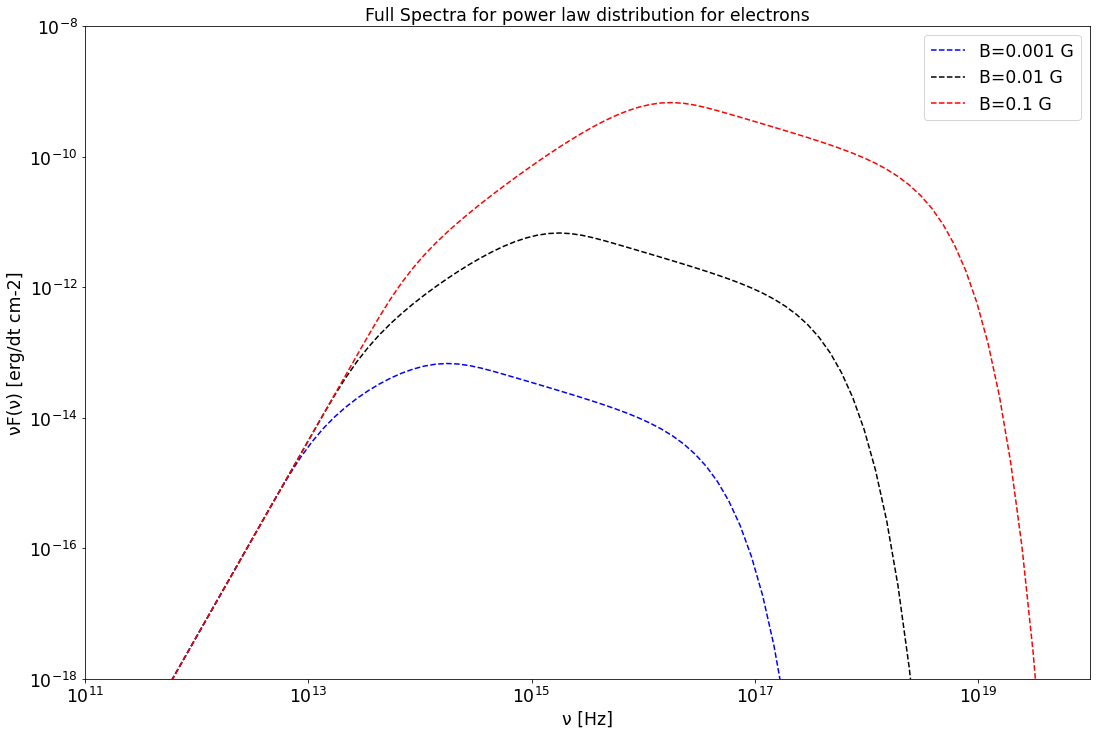

In [5]:
plt.figure(figsize=(18,12))    
#plt.plot(nas,A,label='electrons',ls="--", color="red")
#plt.plot(nas,F)
#plt.plot(q,x)
plt.plot(v_e,v_e*Fabs_e , label='B=0.001 G',ls="--", color="Blue")
plt.plot(v_e,v_e*Fabs_e2 , label='B=0.01 G',ls="--", color="black")
plt.plot(v_e,v_e*Fabs_e3 , label='B=0.1 G',ls="--", color="red")

#plt.plot(v_p,v_p*Fabs_p, label='Protons',ls="--", color="indianred")
#plt.plot(v_p,v_p*Fall, label='SED',ls="--", color="black")

#|plt.scatter(v_e,v_e*Fabs_e, label='Flux',ls="-", color="red")
#plt.plot(v_e,v_e*Pabs2_e, label='My Calc with no correction',ls="--")
#plt.plot(nu,seda,label='Agnst Calc',ls="--", color="black")
#plt.scatter(nu,seda,label='Agnst Calc',ls="--", color="black")
plt.legend()
#plt.plot(v_e,fu)
#plt.plot(v_e,fu1)
#plt.plot(v_e, v_e*Pabs2_e, label='Pabs2_e', color="green")
plt.ylim(1e-18,1e-8)
plt.xlim(1e11,1e20)
plt.xlabel("ν [Hz]")
plt.ylabel("νF(ν) [erg/dt cm-2]")
plt.yscale("log")
plt.xscale("log")
#plt.scatter(dv,nFn)
plt.title("Full Spectra for power law distribution for electrons")    
    
time.sleep(1)


end = time.time()

print(f"Runtime of the program is {end - start}") 

In [6]:
t_ne

array([2.00178643e+005, 1.35807315e+005, 9.21306858e+004, 6.24966976e+004,
       4.23912935e+004, 2.87513009e+004, 1.94981319e+004, 1.32213409e+004,
       8.96387938e+003, 6.07636657e+003, 4.11819616e+003, 2.79042718e+003,
       1.89024426e+003, 1.28005526e+003, 8.66521842e+002, 5.86330623e+002,
       3.96538340e+002, 2.68020913e+002, 1.81028653e+002, 1.22170642e+002,
       8.23688142e+001, 5.54700280e+001, 3.73045497e+001, 2.50474254e+001,
       1.67853359e+001, 1.12228485e+001, 7.48322975e+000, 4.97339637e+000,
       3.29236811e+000, 2.16922092e+000, 1.42104378e+000, 9.24457552e-001,
       5.96326978e-001, 3.80703007e-001, 2.39986736e-001, 1.48952992e-001,
       9.07105628e-002, 5.39736603e-002, 3.12210809e-002, 1.74563201e-002,
       9.37454252e-003, 4.80477524e-003, 2.33758437e-003, 1.07645501e-003,
       4.70048250e-004, 1.96199525e-004, 7.93450513e-005, 3.15480852e-005,
       1.24636698e-005, 4.91618899e-006, 1.93851945e-006, 7.64224489e-007,
       3.01183514e-007, 1